Desafio 12: Otimizando o Estoque de uma Rede de Lojas

📂 Dataset: Informações de estoque e vendas de produtos em várias unidades de uma rede de lojas, com colunas como: Produto, Loja, Estoque_Atual, Unidades_Vendidas_Mes, Custo_Unitario, Preco_Unitario.

🎯 Atividades (nível mais desafiador):

Qual loja possui o maior giro de estoque (Unidades Vendidas / Estoque Atual)?

Quais produtos estão com baixa rotatividade (menos de 30% de giro)?

Qual o lucro total por produto em todas as lojas?

Quais produtos deveriam receber reposição urgente (Estoque Atual < 10 unidades e alta rotatividade)?

Crie um gráfico de barras horizontal com os 5 produtos mais lucrativos.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#testando dataset
df = pd.read_csv("dia_12_estoque_lojas.csv")
df.head()

,Produto,Loja,Estoque_Atual,Unidades_Vendidas_Mes,Custo_Unitario,Preco_Unitario
0,Produto_1,Loja_1,80,28,76.60,102.41
1,Produto_1,Loja_2,8,4,11.31,21.79
2,Produto_1,Loja_3,57,6,13.01,25.52
3,Produto_1,Loja_4,79,1,70.84,140.64
4,Produto_1,Loja_5,87,36,10.20,16.00


In [68]:
#Qual loja possui o maior giro de estoque (Unidades Vendidas / Estoque Atual)?
df["Giro_De_Estoque"] = df["Unidades_Vendidas_Mes"] / df["Estoque_Atual"]
giroLoja = df.groupby("Loja")["Giro_De_Estoque"].sum()
print(f"A loja com maior giro de estoque foi a: {giroLoja.idxmax()} com o giro de estoque de {giroLoja.max():.2f}")

A loja com maior giro de estoque foi a: Loja_2 com o giro de estoque de 9.42


In [90]:
#Quais produtos estão com baixa rotatividade (menos de 30% de giro)?
produtoGiro = df.groupby("Produto")["Giro_De_Estoque"].sum()
print(f"Produtos que estão com baixa rotatividade: \n\n{produtoGiro[produtoGiro > 0.30].to_string()}")

Produtos que estão com baixa rotatividade: 

Produto
Produto_1     1.381714
Produto_10    3.000743
Produto_11    3.248462
Produto_12    2.663713
Produto_13    2.819165
Produto_14    3.138241
Produto_15    2.778276
Produto_2     2.436958
Produto_3     2.413829
Produto_4     2.385736
Produto_5     3.489022
Produto_6     2.637585
Produto_7     3.459782
Produto_8     3.583044
Produto_9     2.339497


In [80]:
#Qual o lucro total por produto em todas as lojas?,
df["Lucro_Total"] = df["Unidades_Vendidas_Mes"] * (df["Preco_Unitario"] - df["Custo_Unitario"])
lucroProduto = df.groupby("Produto")["Lucro_Total"].sum().sort_values(ascending=False)
print(f"Lucro total dos produtos por ordem de lucro: \n\n{lucroProduto.apply(lambda x: f"R${x:,.2f}")}")

Lucro total dos produtos por ordem de lucro: 

Produto
Produto_11    R$7,440.63
Produto_5     R$6,711.69
Produto_7     R$6,120.41
Produto_9     R$5,268.95
Produto_15    R$4,959.75
Produto_12    R$3,788.06
Produto_6     R$3,591.24
Produto_14    R$3,586.29
Produto_4     R$2,931.22
Produto_3     R$2,713.04
Produto_8     R$2,615.83
Produto_2     R$2,478.91
Produto_13    R$2,078.02
Produto_10    R$1,824.89
Produto_1     R$1,118.26
Name: Lucro_Total, dtype: object


In [92]:
#Quais produtos deveriam receber reposição urgente (Estoque Atual < 10 unidades e alta rotatividade)?
reposicao = df[(df["Estoque_Atual"] < 10) & (df["Giro_De_Estoque"] > 0.5)]
print(f"Produtos que deveriam receber reposição urgente: \n\n{reposicao[["Produto", "Estoque_Atual", "Giro_De_Estoque"]]}")

Produtos que deveriam receber reposição urgente: 

       Produto  Estoque_Atual  Giro_De_Estoque
55  Produto_12              9         0.888889


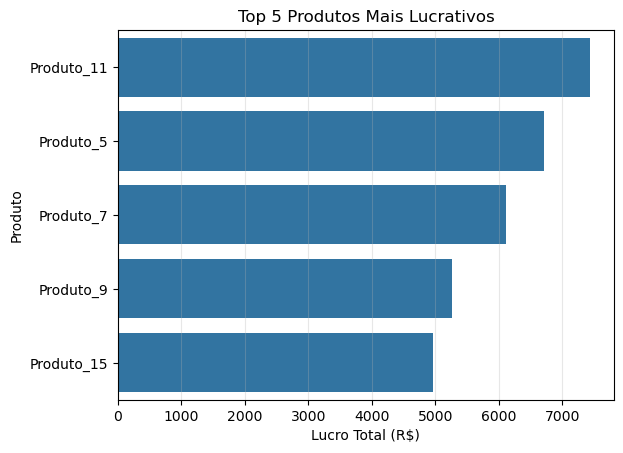

In [88]:
#Crie um gráfico de barras horizontal com os 5 produtos mais lucrativos.
maisLucro = lucroProduto.sort_values(ascending=False).head(5)
sns.barplot(x=maisLucro.values, y=maisLucro.index)
plt.title("Top 5 Produtos Mais Lucrativos")
plt.ylabel("Produto")
plt.xlabel("Lucro Total (R$)")
plt.grid(axis='x', linestyle='-', alpha=0.3)
plt.show()